# Positrack data transformation

We use this notebook to save the transformation to the positrack data. We need all our spatial data to be in the same coordinate system and time system.

Arena center should be 0,0 and bridge should be in the direction of the 0,-1 vector.


* We will have a x factor to scale the pixels to cm.
* We will have a [x,y] vector to translate the center of the arena to 0,0.
* We will have a 2x2 matrix to rotate the coordinates if needed.
* We will get the ROS time for each position in the animal pose

We will then save it to a npy file for later use.

The scaling to cm is done via the px_to_cm file in each session directory.

We need to run this on all sessions.


## Limitations

The old positrack had 1 camera and we could not properly get the position of the mouse in the home base.

**Warnings** 

We will modify the `ap.pose` and save it to the file. To get it in the right format, you need to run this code from top to bottom. The 8th column will be the ROS time.

In [1]:
from pathlib import Path
%load_ext autoreload
%autoreload 2
%run setup_project.py
load_parameters_from_files_project(sSesList)

Project name: autopi_ca1
dataPath: /adata/projects/autopi_ca1
dlcModelPath: /adata/models
Reading /adata/projects/autopi_ca1/sessionList
We have 40 testing sessions in the list
See myProject and sSesList objects


100%|██████████████████████████████████████████| 40/40 [00:00<00:00, 469.28it/s]


# Process one session

Here is how to process one session.

We will use the spikeA sessions to get the positrack files.

# px_per_cm

Should be 9.75 for positrack file and 5.7 for positrack2 file.

Let's overwrite them here.

In [2]:
for i,ses in enumerate(sSesList):
    ses.load_parameters_from_files() 
    if os.path.exists(ses.path+"/"+ses.trial_names[0]+".positrack"):
       # pass
        print(ses.name,i,"positrack")
       # fn = "{}/{}.px_per_cm".format(ses.path,ses.name)
       # print(fn)
       # with open(fn, 'w') as f:
       #     f.write('%f\n' % 9.75)
    elif os.path.exists(ses.path+"/"+ses.trial_names[0]+".positrack2"):
        #pass 
        print(ses.name,i,"positrack2")
        #fn = "{}/{}.px_per_cm".format(ses.path,ses.name)
        #print(fn)
        #with open(fn, 'w') as f:
        #    f.write('%f\n' % 5.7)
    else:
        print(ses.name,"No valid position data file")
        

mn5824-20112020-0107 0 positrack
mn5824-22112020-0107 1 positrack
mn5824-24112020-0107 2 positrack
mn5824-02122020-0106 3 positrack
mn711-28012021-0106 4 positrack
mn711-30012021-0106 5 positrack
mn711-31012021-0107 6 positrack
mn711-01022021-0107 7 positrack
mn711-02022021-0108 8 positrack
mn711-03022021-0107 9 positrack
mn711-04022021-0107 10 positrack
mn2739-11022021-0107 11 positrack
mn2739-15022021-0105 12 positrack
mn2739-16022021-0106 13 positrack
mn2739-17022021-0106 14 positrack
mn2739-21022021-0106 15 positrack
mn3246-09042021-0106 16 positrack
mn3246-10042021-0106 17 positrack
mn3246-12042021-0106 18 positrack
mn3246-14042021-0106 19 positrack
mn1173-02052021-0107 20 positrack
mn1173-06052021-0107 21 positrack
mn1173-08052021-0107 22 positrack
mn1173-09052021-0108 23 positrack
mn1173-11052021-0108 24 positrack
TYY9524-16082021-0106 25 positrack2
TYY9524-18082021-0106 26 positrack2
mn5618-07072021-0107 27 positrack
mn5618-09072021-0106 28 positrack
mn5618-12072021-0110 29 pos

To know for which sessions we have a .pose.py file

In [ ]:
for e,ses in enumerate(sSesList) :
    print(e,ses.name)
    ap = Animal_pose(ses)
    ap.pose_file_extension = ".pose_kf.npy"
    try: 
        ap.load_pose_from_file()
        print("pose dim: {}".format(ap.pose.shape[1]))
    except IOError:
        print("no {}{}".format(ses.name,ap.pose_file_extension))

0 mn5824-20112020-0107
pose dim: 8
1 mn5824-22112020-0107
pose dim: 8
2 mn5824-24112020-0107
pose dim: 8
3 mn5824-02122020-0106
pose dim: 8
4 mn711-28012021-0106
pose dim: 8
5 mn711-30012021-0106
pose dim: 8
6 mn711-31012021-0107
pose dim: 8
7 mn711-01022021-0107


* We created a `sesssionName.pose.npy` from the `positrack` or `positrack2` files


* We created a `sessionName.posekf.npy` from the `positrack_kf` or `positrack2_kf` files


In [4]:
with_kf=True # decide whether you want to create the pose.npy or pose_kf.npy

In [5]:
import os.path
def get_ext(ses,with_kf):
    """
    Get the extension for the positrack file
    """
    if os.path.exists(ses.path+"/"+ses.trial_names[0]+".positrack"):
        print("positrack")
        if with_kf:
            ext="positrack_kf"
        else:
            ext="positrack"
    elif os.path.exists(ses.path+"/"+ses.trial_names[0]+".positrack2"):
        print("positrack2")
        if with_kf:
            ext="positrack2_kf"
        else:
            ext="positrack2"
    else:
        print("No valid position data file")
    return ext

get_ext(ses,with_kf)

positrack2


'positrack2_kf'

This loop will extract the ttl pulses from the .dat files. Next time it will be much faster.

In [19]:
for i, ses in enumerate(sSesList[25:27]):
#ses = sSesList[7]
    print("************<<<>>>>************")
    ses.load_parameters_from_files()
    print(i, ses.name,ses.px_per_cm)
    ext = get_ext(ses,with_kf)
    print(ext)
    ap = Animal_pose(ses)
    if ext=="positrack_kf" or ext =="positrack2_kf":
        ap.pose_file_extension = ".pose_kf.npy"
    ap.pose_from_positrack_files(extension=ext)
    ses.ap = ap # keep the ap for later

************<<<>>>>************
0 TYY9524-16082021-0106 5.7
positrack2
positrack2_kf
Interpolation step: 400.0 samples
/adata/projects/autopi_ca1/TYY9524/TYY9524-16082021-0106/TYY9524-16082021_01.dat
/adata/projects/autopi_ca1/TYY9524/TYY9524-16082021-0106/TYY9524-16082021_01.positrack2_kf
Getting ttl pulses time from /adata/projects/autopi_ca1/TYY9524/TYY9524-16082021-0106/TYY9524-16082021_01.ttl_up.npy
Number of ttl pulses detected: 53917
Number of lines in positrack file: 53917
hdRange: 6.283063134131947
Invalid values: 14528
Valid values: 255057
Percentage of invalid values: 5.39%
****************************************************************************************
WARNING
The percentage of invalid values is very high. The quality of your data is compromised.
Solve this problem before continuing your experiments.
****************************************************************************************
/adata/projects/autopi_ca1/TYY9524/TYY9524-16082021-0106/TYY9524-16082021_02.da

## Fix the position reference frame (0,0 = arena center, bridge in direction 0,-1)


Deal with the different tracking systems (positrack or positrack2) and from kalman filtered data or not (with_kf variable)

If the transformation was applied before, the transformation is save in a file and can be reapplied automatically later on.

You can only apply the transformation once!!! If you do it twice, the center of the arena will not be 0,0. You will need to recreate the pose.npy with the code above.

In [12]:
def translate_pose(ses,ap):
    fn = ses.path+".arena_coordinates_transform.npy"
    coord_file = Path(fn)
    if coord_file.exists():
        coord = np.load(coord_file)
        print("coordinates:",coord)
        newPose = ap.pose.copy()
        
        plt.figure(figsize=(10,10))
        plt.gca().set_aspect('equal', adjustable='box')
        plt.plot(newPose[:,1],newPose[:,2])
        plt.title("Before transformation")
        plt.show()
        
        
        
        newPose[:,1]=newPose[:,1]-coord[0]
        newPose[:,2]=newPose[:,2]-coord[1]
        
        r=40
        plt.figure(figsize=(10,10))
        plt.gca().set_aspect('equal', adjustable='box')
        plt.plot(newPose[:,1],newPose[:,2])
        pt = np.arange(0,2*np.pi,0.01)
        plt.plot(np.cos(pt)*r,np.sin(pt)*r,c="red")
        plt.show()

        if ext=="positrack" or ext=="positrack_kf":
            rot=np.pi/2
            rotM = np.array([[np.cos(rot),-np.sin(rot)],[np.sin(rot),np.cos(rot)]])
            newPose[:,1:3] = np.matmul(newPose[:,1:3],rotM)
            newPose[:,4] = np.arctan2(np.sin(newPose[:,4]-(np.pi/2)),np.cos(newPose[:,4]-(np.pi/2)))


        plt.figure(figsize=(10,10))
        plt.gca().set_aspect('equal', adjustable='box')
        plt.plot(newPose[:,1],newPose[:,2])
        pt = np.arange(0,2*np.pi,0.01)
        plt.plot(np.cos(pt)*r,np.sin(pt)*r,c="red")
        plt.show("After transformation")
        plt.show()

        ap.pose_ori = newPose
        ap.save_pose_to_file()
    else:
        print("create the .arena_coordinates_transform.npy manually with the code below.")

************<<<>>>>************
1 TYY9524-16082021-0106 5.7
positrack2
positrack2_kf
Interpolation step: 400.0 samples
/adata/projects/autopi_ca1/TYY9524/TYY9524-16082021-0106/TYY9524-16082021_01.dat
/adata/projects/autopi_ca1/TYY9524/TYY9524-16082021-0106/TYY9524-16082021_01.positrack2_kf
Getting ttl pulses time from /adata/projects/autopi_ca1/TYY9524/TYY9524-16082021-0106/TYY9524-16082021_01.ttl_up.npy
Number of ttl pulses detected: 53917
Number of lines in positrack file: 53917
hdRange: 6.283063134131947
Invalid values: 14528
Valid values: 255057
Percentage of invalid values: 5.39%
****************************************************************************************
WARNING
The percentage of invalid values is very high. The quality of your data is compromised.
Solve this problem before continuing your experiments.
****************************************************************************************
/adata/projects/autopi_ca1/TYY9524/TYY9524-16082021-0106/TYY9524-16082021_02.da

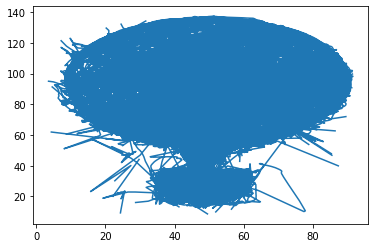

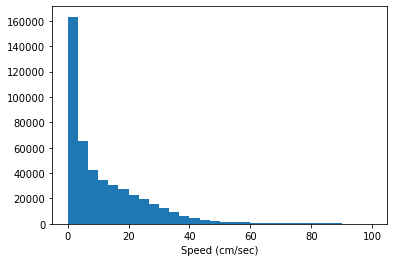

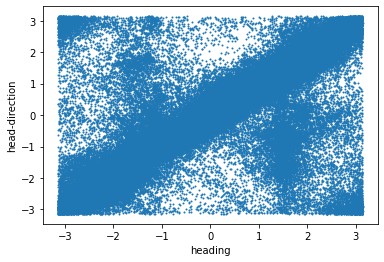

coordinates: [50 94 40]


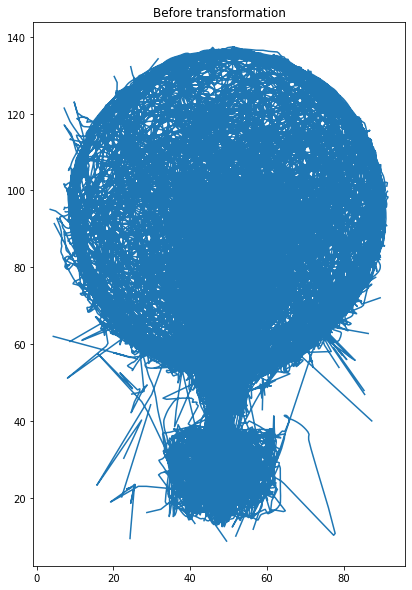

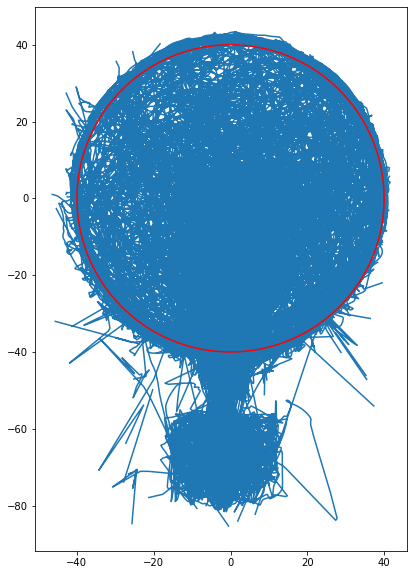

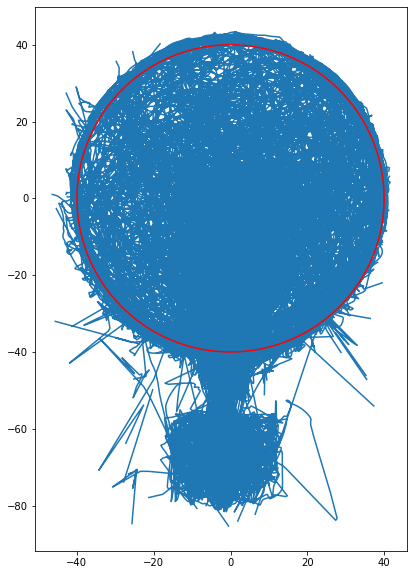

Saving original pose to /adata/projects/autopi_ca1/TYY9524/TYY9524-16082021-0106/TYY9524-16082021-0106.pose_kf.npy
************<<<>>>>************
1 TYY9524-18082021-0106 5.7
positrack2
positrack2_kf
Interpolation step: 400.0 samples
/adata/projects/autopi_ca1/TYY9524/TYY9524-18082021-0106/TYY9524-18082021_01.dat
/adata/projects/autopi_ca1/TYY9524/TYY9524-18082021-0106/TYY9524-18082021_01.positrack2_kf
Getting ttl pulses time from /adata/projects/autopi_ca1/TYY9524/TYY9524-18082021-0106/TYY9524-18082021_01.ttl_up.npy
Number of ttl pulses detected: 53911
Number of lines in positrack file: 53911
hdRange: 6.283045680839427
Invalid values: 22573
Valid values: 246982
Percentage of invalid values: 8.37%
****************************************************************************************
WARNING
The percentage of invalid values is very high. The quality of your data is compromised.
Solve this problem before continuing your experiments.
*****************************************************

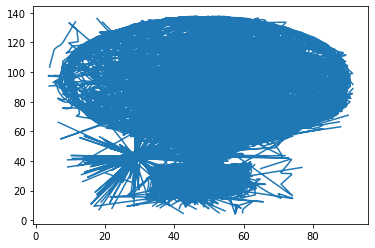

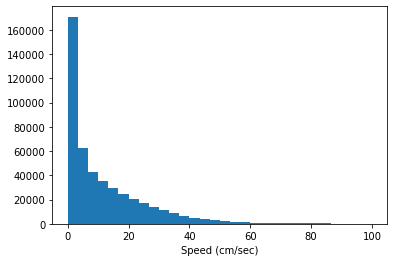

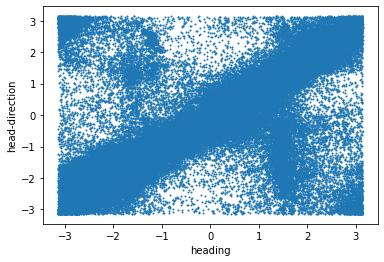

coordinates: [50 94 40]


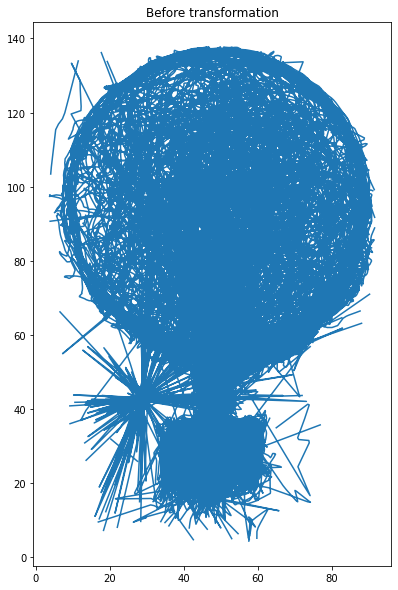

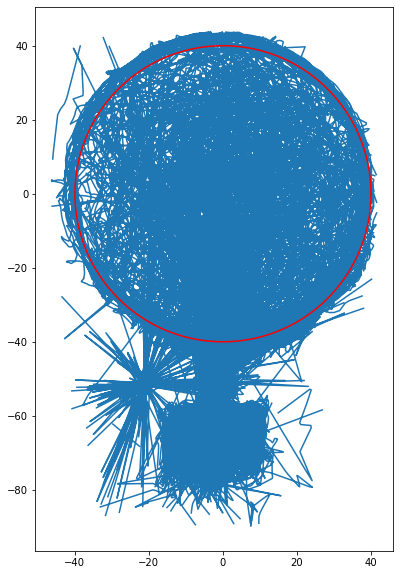

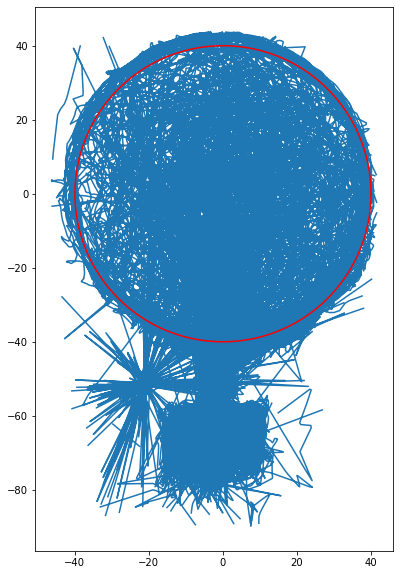

Saving original pose to /adata/projects/autopi_ca1/TYY9524/TYY9524-18082021-0106/TYY9524-18082021-0106.pose_kf.npy


In [20]:
for ses in sSesList[25:27]:
#    ses = sSesList[39]

    print("************<<<>>>>************")
    ses.load_parameters_from_files()
    print(i, ses.name,ses.px_per_cm)
    ext = get_ext(ses,with_kf)
    print(ext)
    ap = ses.ap 
    if ext=="positrack_kf":
        ap.pose_file_extension = ".pose_kf.npy"
    ap.pose_from_positrack_files(extension=ext)

    plt.plot(ap.pose[:,1],ap.pose[:,2])
    plt.show()
    
    xd = np.diff(ap.pose[:,1],append=np.nan)
    yd = np.diff(ap.pose[:,2],append=np.nan)
    td = np.diff(ap.pose[:,0],append=np.nan)
    heading = np.arctan2(yd,xd)
    speed= np.sqrt(xd**2+yd**2)/td
    speed[speed>100] = np.nan
    plt.hist(speed,bins=30)
    plt.xlabel("Speed (cm/sec)")
    plt.show()
    indices = speed >  10

    plt.scatter(heading[indices],ap.pose[indices,4],s=1)
    plt.xlabel("heading")
    plt.ylabel("head-direction")
    plt.show()

    translate_pose(ses,ap)

Create the `arena_coordinates_transform.npy` manually once.

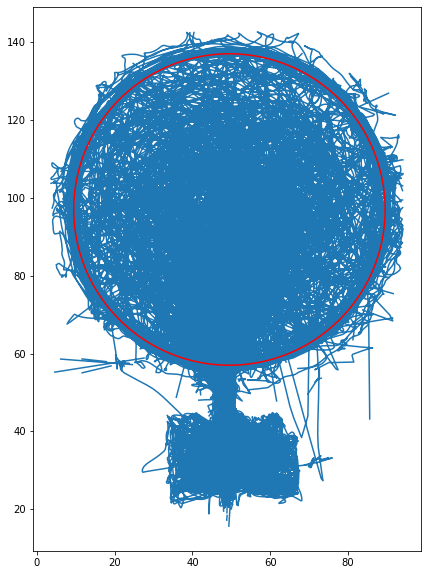

saving /adata/projects/autopi_ca1/mn9686/mn9686-01112021-0106.arena_coordinates_transform.npy


In [228]:
plt.figure(figsize=(10,10))
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(ap.pose[:,1],ap.pose[:,2])

# values to adjust
if  ext=="positrack2" or ext=="positrack2_post" or ext=="positrack2_kf":
    xCenter=49.5
    yCenter=97
    r=40
else :
    xCenter=48
    yCenter=46
    r=40
pt = np.arange(0,2*np.pi,0.01)
plt.plot(np.cos(pt)*r+xCenter,np.sin(pt)*r+yCenter,c="red")
plt.show()

coord = np.array([xCenter,yCenter,r])

fn = ses.path+".arena_coordinates_transform.npy"
coord_file = Path(fn)
print("saving",fn)
np.save(fn,coord)

If we are happy with the results, we could save the newPose in the Animal_pose object and save the position data (ap.pose) into a npy file. Thereafter, we can simply load the data with ap.load_pose_from_file().

## Add a time reference to ROS events

The ROS time refers to the computer time. The different computers on the system should be syncrhonized with `chrony`.
The other time we have is the sample number in the recordings. For instance if we record at 20kHz, sample 20000 is 1 second.

We need to add the ROS time to each data point of the pose array. This can then be used to select specific time periods that are stored in ROS time.

Strategy:

1. With positrack2, we have a ROS time for each positrack frame, this is stored in the positrack2 file. We can do interpolation like we did for position data. This assumes that the position tracking computer (jetson) has the same computer time as the recording computer (ktan).

2. For each trial, we interpolate the time as we do for position, then do the interpolation for the data of all trials.


For positrack2, the data is in a very nice format.

For positrack, the data is in a shitty format (in positrack_log file). 

The positrack_log file only contains time for some trials, and many frames are missing.



Now let's do a loop for all trials

In [14]:
def get_all_ros_res_times_positrack(ses,ap):
    """
    get the ros and res time for all positrack frame
    Works for session using the old positrack software
    """
    # read log file
    fn=ses.path+"/"+ses.name+".positrack_log"
    if not os.path.exists(fn):
        print("missing " + fn)
    posi_log = pd.read_csv(fn,delimiter=" ")
    posi_log.columns=["no","time","trialNo"] # set column names that match our positrack file

    # iterate for trials 
    all_ros_res_times = np.empty(shape=(0,2))

    for i,t in enumerate(ap.ses.trial_names):
        positrack_file_name = ap.ses.path + "/" + t+"."+ ext
        print(t)
        if ext == "positrack":
            pt = pd.read_csv(positrack_file_name, delimiter=" ")
        else:
            pt = pd.read_csv(positrack_file_name)

        tNo = int(t[-1]) # get the trial number

        if len(posi_log.time.loc[posi_log.trialNo==tNo]) == 0:
            print("no log time, creating an array of np.nan")
            ros_times = np.empty(len(pt))
            ros_times[:] = np.nan
        else:
            print("match available times, and interpolate the missing one")
            # get the ROS time of some frames of the selected trials
            posi_sel = posi_log.loc[posi_log.trialNo==tNo]

            # add the res time to the positrack data
            if len(pt) != len(ap.ttl_ups[tNo-1]):
                print("problem with positrack and ttl_ups length")
            pt["res"] = ap.ttl_ups[tNo-1] 

           
            # merge, keeping only frames with a ros time
            pt_mrg = pd.merge(pt,posi_sel,on="no")

            # we interpolate the ros time to frames for which we don't have a ros time
            fx = interp1d(pt_mrg.res, pt_mrg.time, bounds_error=False) # x we will start at 0 until the end of the file
            ros_times = fx(pt.res)

        ar = np.vstack([ros_times,ap.ttl_ups[tNo-1]]).T
        print(ar.shape)
        all_ros_res_times = np.vstack([all_ros_res_times,ar])
        print(len(pt),len(posi_log.time.loc[posi_log.trialNo==tNo]),len(ros_times),all_ros_res_times.shape)
    return all_ros_res_times

def get_all_ros_res_times_positrack2(ses,ap):
    """
    Get the ros and res times for all the positrack2 frames.
    Works for sessions in which positrack2 was used.
    """
    # iterate for trials 
    all_ros_res_times = np.empty(shape=(0,2))

    for i,t in enumerate(ap.ses.trial_names):
        positrack_file_name = ap.ses.path + "/" + t+"."+ ext
        print(t)
        pt = pd.read_csv(positrack_file_name)
        tNo = int(t[-1]) # get the trial number

        res = ap.ttl_ups[tNo-1] 
        ros = pt.acq_time_source_0
        
        ar = np.vstack([ros,res]).T
        print(ar.shape)
        all_ros_res_times = np.vstack([all_ros_res_times,ar])
        print(len(pt),len(ros),all_ros_res_times.shape)
    return all_ros_res_times

def interpolate_pose_ros_times(ap,all_ros_res_times):
    """
    Get the ROS time of all rows in the Animal_pose.pose array
    
    We have the ROS time and res time of all rows of the positrack file.
    We just need to interpolate to get the ROS time at fixed intervals (rows in Animal_pose.pose have a fixed intervals)
    """
    res = ap.pose[:,0]*ses.sampling_rate
    print("res time:",np.min(res),np.max(res))
    fx = interp1d(all_ros_res_times[:,1], all_ros_res_times[:,0], bounds_error=False) # x we will start at 0 until the end of the file
    ros_times = fx(res)
    print("ROS time:",np.nanmin(ros_times),np.nanmax(ros_times),"Ros duration (sec):", np.nanmax(ros_times)-np.nanmin(ros_times))
    return ros_times

In [15]:
from datetime import datetime, timezone

1 TYY9524-16082021-0106 5.7
positrack2
positrack2_kf
Loading original pose from /adata/projects/autopi_ca1/TYY9524/TYY9524-16082021-0106/TYY9524-16082021-0106.pose_kf.npy
Reading /adata/projects/autopi_ca1/TYY9524/TYY9524-16082021-0106/TYY9524-16082021_01.positrack2_kf
TYY9524-16082021_01
(53917, 2)
53917 53917 (53917, 2)
TYY9524-16082021_02
(36022, 2)
36022 36022 (89939, 2)
TYY9524-16082021_03
(53993, 2)
53993 53993 (143932, 2)
TYY9524-16082021_04
(54134, 2)
54134 54134 (198066, 2)
TYY9524-16082021_05
(54042, 2)
54042 54042 (252108, 2)
TYY9524-16082021_06
(36144, 2)
36144 36144 (288252, 2)
1629127834.554284 1629139239.3399568
201964.0 193596423.0
res time: 0.0 193715200.0
ROS time: 1629127834.5559866 1629139239.3399568 Ros duration (sec): 11404.783970117569
(484289, 7) (484289,)
TYY9524-16082021-0106 /adata/projects/autopi_ca1/TYY9524/TYY9524-16082021-0106
task log file events from : 2021-08-16 16:47:46.431144+00:00 to 2021-08-16 18:18:46.642104+00:00
1629132466.431144 1629137926.6421

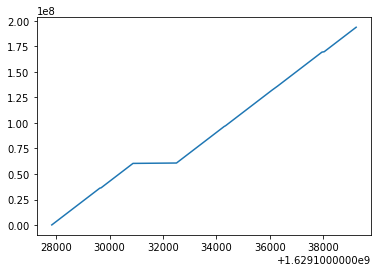

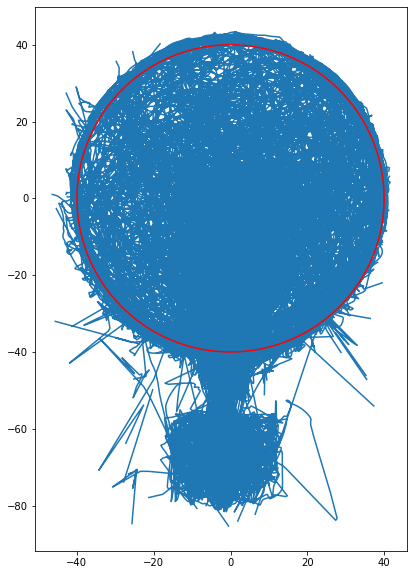

[[0.    nan  nan  nan  nan  nan  nan  nan]
 [0.02  nan  nan  nan  nan  nan  nan  nan]
 [0.04  nan  nan  nan  nan  nan  nan  nan]
 [0.06  nan  nan  nan  nan  nan  nan  nan]
 [0.08  nan  nan  nan  nan  nan  nan  nan]
 [0.1   nan  nan  nan  nan  nan  nan  nan]
 [0.12  nan  nan  nan  nan  nan  nan  nan]
 [0.14  nan  nan  nan  nan  nan  nan  nan]
 [0.16  nan  nan  nan  nan  nan  nan  nan]
 [0.18  nan  nan  nan  nan  nan  nan  nan]]
(484289, 8)
1 TYY9524-18082021-0106 5.7
positrack2
positrack2_kf
Loading original pose from /adata/projects/autopi_ca1/TYY9524/TYY9524-18082021-0106/TYY9524-18082021-0106.pose_kf.npy
Reading /adata/projects/autopi_ca1/TYY9524/TYY9524-18082021-0106/TYY9524-18082021_01.positrack2_kf
TYY9524-18082021_01
(53911, 2)
53911 53911 (53911, 2)
TYY9524-18082021_02
(35996, 2)
35996 35996 (89907, 2)
TYY9524-18082021_03
(54120, 2)
54120 54120 (144027, 2)
TYY9524-18082021_04
(53988, 2)
53988 53988 (198015, 2)
TYY9524-18082021_05
(54130, 2)
54130 54130 (252145, 2)
TYY9524-180820

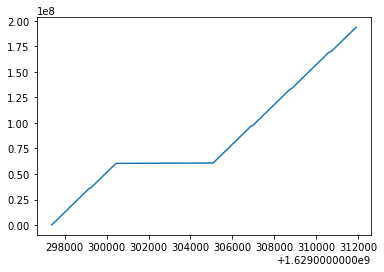

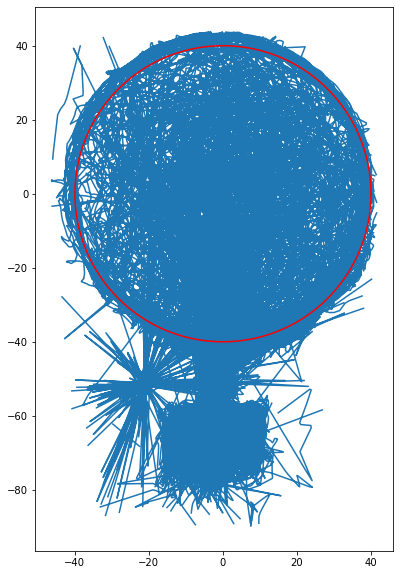

[[0.    nan  nan  nan  nan  nan  nan  nan]
 [0.02  nan  nan  nan  nan  nan  nan  nan]
 [0.04  nan  nan  nan  nan  nan  nan  nan]
 [0.06  nan  nan  nan  nan  nan  nan  nan]
 [0.08  nan  nan  nan  nan  nan  nan  nan]
 [0.1   nan  nan  nan  nan  nan  nan  nan]
 [0.12  nan  nan  nan  nan  nan  nan  nan]
 [0.14  nan  nan  nan  nan  nan  nan  nan]
 [0.16  nan  nan  nan  nan  nan  nan  nan]
 [0.18  nan  nan  nan  nan  nan  nan  nan]]
(484212, 8)


In [22]:
for ses in sSesList[25:27]:
#    ses = sSesList[-1]


    ses.load_parameters_from_files()
    print(i, ses.name,ses.px_per_cm)
    ext = get_ext(ses,with_kf)
    print(ext)
    ap = ses.ap
    if ext=="positrack_kf":
        ap.pose_file_extension = ".pose_kf.npy"
    ap.load_pose_from_file(verbose=True)



    if ext == "positrack2" or ext == "positrack2_post" or ext=="positrack2_kf" or ext=="positrack_kf":
        fn = ses.path+"/"+ses.trial_names[0]+"." +ext
        print("Reading",fn)
        pt = pd.read_csv(fn)
    else:
        fn = ses.path+"/"+ses.trial_names[0]+".positrack"
        pt = pd.read_csv(fn,delimiter=" ")



    if ext == "positrack" or ext == "positrack_kf":
        all_ros_res_times = get_all_ros_res_times_positrack(ses,ap)
    elif ext == "positrack2" or ext == "positrack2_post" or ext=="positrack2_kf":
        all_ros_res_times = get_all_ros_res_times_positrack2(ses,ap)

    plt.plot(all_ros_res_times[:,0],all_ros_res_times[:,1])
    print(np.nanmin(all_ros_res_times[:,0]),np.nanmax(all_ros_res_times[:,0]))
    print(np.nanmin(all_ros_res_times[:,1]),np.nanmax(all_ros_res_times[:,1]))


    ros_times = interpolate_pose_ros_times(ap,all_ros_res_times)
    print(ap.pose.shape,ros_times.shape)



    def rosTimeToDateTime(rt):
        return datetime.fromtimestamp(rt,tz=timezone.utc)

    print(ses.name,ses.path)
    log = pd.read_csv(ses.path+"/"+ses.name+".log",sep=" ")
    #lp_times = log.time[log.event=="leverPress"].to_numpy()
    lp_times = log.time.to_numpy()
    lp_time_min=rosTimeToDateTime(np.min(lp_times))
    lp_time_max=rosTimeToDateTime(np.max(lp_times))

    print("task log file events from :",lp_time_min ,"to",lp_time_max)
    print(np.min(lp_times),np.max(lp_times))
    pose_time_min=rosTimeToDateTime(np.nanmin(ros_times))
    pose_time_max=rosTimeToDateTime(np.nanmax(ros_times))
    print("positrack file from :",pose_time_min ,"to",pose_time_max)
    print(np.nanmin(ros_times),np.nanmax(ros_times))

    ap.pose_ori = np.hstack([ap.pose_ori[:,0:7],np.expand_dims(ros_times,1)])
    ap.save_pose_to_file()

    ap.load_pose_from_file(verbose=True)
    if ap.pose_ori.shape[1] != 8:
        print("!!!!Problem with the shape of the ap.pose {}!!!!".format(ap.pose_ori.shape))

    r=40
    plt.figure(figsize=(10,10))
    plt.gca().set_aspect('equal', adjustable='box')
    plt.plot(ap.pose_ori[:,1],ap.pose_ori[:,2])
    pt = np.arange(0,2*np.pi,0.01)
    plt.plot(np.cos(pt)*r,np.sin(pt)*r,c="red")
    plt.show()

    print(ap.pose_ori[0:10,:])
    print(ap.pose_ori.shape)

We now need a ROS time for each row of the ap.pose matrix. The first column is the time in seconds.